## <span style="color:blue">  Esercizio 8</span>

### Esercizio 08.1

Scrivere un codice Variational Monte Carlo per una singola particella in 1D che tramite l'algoritmo M-H campiona la funzione d'onda. Usando i data blocking, il codice deve riuscire a calcolare il valore di aspettazione per l'hamiltoniana.

$$
\langle {\hat H} \rangle_T = 
\frac{\int dx \Psi^*_T(x) {\hat H} \Psi_T(x)}
{\int dx |\Psi_T(x)|^2} = 
\int dx \frac{|\Psi_T(x)|^2}{\int dx |\Psi_T(x)|^2} \frac{{\hat H} \Psi_T(x)}{\Psi_T(x)}
$$

che può essere usato per trovare i parametri che minimizzano questa quantità.

### Esercizio 08.2

Usare VMC per trovare i parametri $\sigma$ e $\mu$ che minimizzano $\langle {\hat H} \rangle_T$:  

$$
\langle {\hat H} \rangle_T = \frac{\langle \Psi_T^{\sigma,\mu}| {\hat H} | \Psi_T^{\sigma,\mu} \rangle}
{\langle \Psi_T^{\sigma,\mu} | \Psi_T^{\sigma,\mu} \rangle} \ge E_0 =
\frac{\langle \Psi_0| {\hat H} | \Psi_0 \rangle}
{\langle \Psi_0 | \Psi_0 \rangle}
$$

- <span style="color:red"> Mostrare un grafico con la stima di $\langle {\hat H} \rangle_T$ </span> e la sua incertezza statistica in funzione di numero di blocchi per i set di parametri che minimizzano $\langle {\hat H} \rangle_T$.

- <span style="color:red">Mostrare anche **il campionamento** di $|\Psi_T(x)|^2$</span> riempendo un'istogramma con la configurazione campionata, comparare con la curva analitica di $|\Psi_T(x)|^2$ e con quella numerica. 

#### Eseguo il programma in c++ variando le coppie di valori $\sigma^{2}$ e $\mu$

In [49]:
#!/usr/bin/python
# -*- coding: latin-1 -*-

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math
from scipy.optimize import curve_fit
import subprocess
from shutil import *
from glob import glob

sigma2=[0.35,0.36,0.37,0.40,0.43,0.45]
mu=[0.70,0.75,0.78,0.80,0.82,0.85]


with open('input.dat', 'r') as file:
	data = file.readlines()

for i in range(len(mu)):
	data[2] = str(mu[i]) + "\n" 
	for j in range(len(sigma2)):
		data[3] = str(sigma2[j]) + "\n" 
		with open('input.dat', 'w') as file:
			file.writelines(data)
		cmd = "./ese08"
		value = subprocess.call(cmd, shell = True)  


#### Trovo il valori di $\sigma^{2}$ e $\mu$ che minimizzano l'energia all'interno di "output.e.out.ultimo"

In [50]:
e,m,s = np.loadtxt("output.e.ultimo",unpack=True)

index_min = np.argmin(e)

print ("Il miglior valore per mu è: ", m[index_min])
print ("Il miglior valore per sigma_2 è: ", s[index_min]) 

with open('input.dat', 'r') as file:
	data = file.readlines()

data[2] = str(m[index_min]) + "\n" 
data[3] = str(s[index_min]) + "\n" 

with open('input.dat', 'w') as file:
    file.writelines(data)



Il miglior valore per mu è:  0.8
Il miglior valore per sigma_2 è:  0.37


### $|\Psi_T(x)|^2$ analitica

2.513274948751534


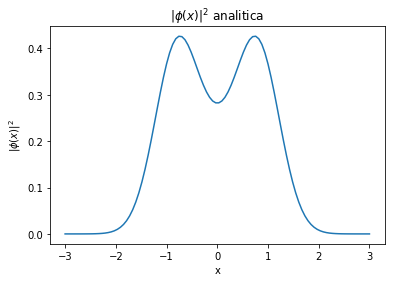

In [56]:
######################### ANALITICA #####################################################
from scipy.integrate import simps 

points=100
x = np.linspace(-3.0,3.0,num=points)
w = np.exp(-pow(x-m[index_min],2.)/s[index_min]) + np.exp(-pow(x+m[index_min],2.)/s[index_min]) + 2*np.exp(-(x*x + m[index_min]*m[index_min])/s[index_min]); 

area = simps(w, dx=0.06)
plt.plot(x, w/area)
plt.title('$|\phi(x)|^{2}$ analitica')
plt.xlabel('x')
plt.ylabel('$|\phi(x)|^{2}$')
plt.show()


### $|\Psi_T(x)|^2$ campionata

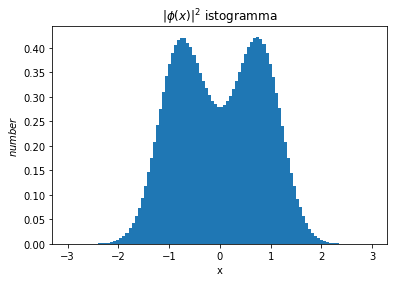

In [52]:
####################### ISTOGRAMMA ###################################################
x,y,erry = np.loadtxt("output.histo.0", delimiter=' ', unpack=True)
plt.bar(x,y,align = 'edge', width=0.06)
plt.xlabel('x')
plt.ylabel('$number$')
plt.title('$|\phi(x)|^{2}$ istogramma ')

plt.show()

### $|\Psi_T(x)|^2$ soluzione numerica

Ground state energy:  -0.46046587969271546
1st excited state energy:  0.09742471331761013
2nd excited state energy:  1.9717331343930202


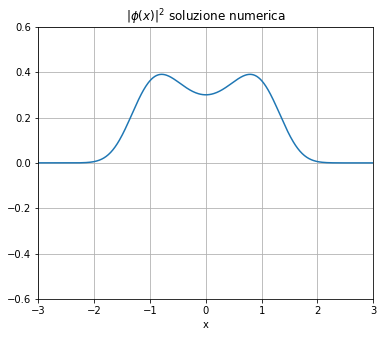

In [4]:
def Vpot(x):
    return (x**2 - 2.5)*x**2
    #return 0.5*x**2

hbar = 1
m = 1
a = 10
N = 1000 # number of iterations

# Step sizes

x = np.linspace(-a/2, a/2, N)
dx = x[1] - x[0] # the step size
V = Vpot(x)

# The central differences method: f" = (f_1 - 2*f_0 + f_-1)/dx^2

CDiff = np.diag(np.ones(N-1),-1)-2*np.diag(np.ones(N),0)+np.diag(np.ones(N-1),1)
# np.diag(np.array,k) construct a "diagonal" matrix using the np.array
# The default is k=0. Use k>0 for diagonals above the main diagonal, 
# and k<0 for diagonals below the main diagonal

# Hamiltonian matrix
H = (-(hbar**2)*CDiff)/(2*m*dx**2) + np.diag(V)

# Compute eigenvectors and their eigenvalues
E,psi = np.linalg.eigh(H)

# Take the transpose & normalize
psi = np.transpose(psi)
psi = psi/np.sqrt(dx)

print("Ground state energy: ", E[0])
print("1st excited state energy: ", E[1])
print("2nd excited state energy: ", E[2])

# Plot a few things
plt.figure(figsize=(6,5))
scale = 0.3

plt.plot(x,(psi[0])**2)


plt.title("$|\phi(x)|^{2}$ soluzione numerica")
plt.xlabel("x")
plt.grid(True)
plt.xlim((-3,3))
plt.ylim((-0.6,0.6))
plt.show()

### Energia media dati $\sigma^{2}$ e $\mu$ 

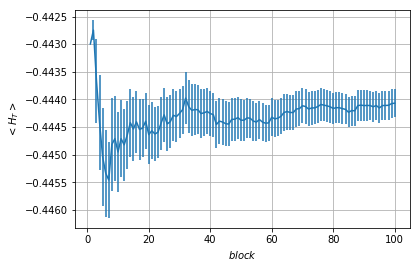

In [4]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math
from scipy.optimize import curve_fit
import subprocess
from shutil import *
from glob import glob

########Energia, calcolata con media a blocchi in funzione dei blocchi
x,a,y,erry = np.loadtxt("output.e.0",unpack=True)



plt.errorbar(x,y,yerr=erry)
plt.xlabel('$block$')
plt.ylabel('$<H_{T}>$')
plt.grid(True)


plt.show()